In [1]:
import os
import sys
import numpy as np

sys.path.append(os.path.join(os.path.dirname('__file__'), '../'))

from ComputeFreq import ComputeFreq
from PatternConversion import NumberToPattern
from FindClumps import betterClumps
from pprint import pprint
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def makeGCratioList(genome):
    baseWeigth = {'G': 1, 'C': -1, 'A': 0, 'T': 0}
    GCratio = [0 for _ in range(len(genome))]
    
    for idx in range(len(genome)):
        if idx == 0:
            GCratio[idx] = (baseWeigth[genome[idx]])    
        else:
            GCratio[idx] = GCratio[idx - 1] + baseWeigth[genome[idx]]
    
    return GCratio

In [3]:
path = "./Vibrio_cholerae.txt"

f = open(path, 'r')
genome = f.readline().strip()
k = 9

In [4]:
GCratio = makeGCratioList(genome)
genomeLoc = list(range(len(genome)))

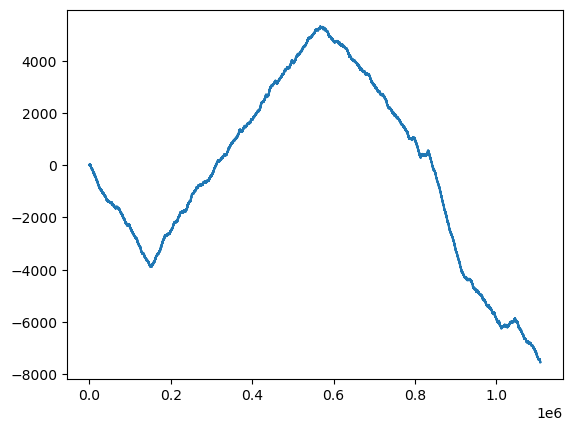

In [7]:
plt.plot(genomeLoc, GCratio)

In [8]:
genomeDF = pd.DataFrame({'Base' : genome,
                        'G-C (%)' : GCratio})

In [9]:
print(len(genome))

1108250


In [10]:
filteredGC = []
for i in range(1, 7):
    filteredGC.append(np.convolve(GCratio, np.ones(10 ** i) / 10 ** i, 'same'))
    print(10 ** i)

10
100
1000
10000


KeyboardInterrupt: 

Text(0.5, 1.0, 'Window Size: 10')

Text(0.5, 1.0, 'Window Size: 10000')

Text(0.5, 1.0, 'Window Size: 100')

Text(0.5, 1.0, 'Window Size: 100000')

Text(0.5, 1.0, 'Window Size: 1000')

Text(0.5, 1.0, 'Window Size: 1000000')

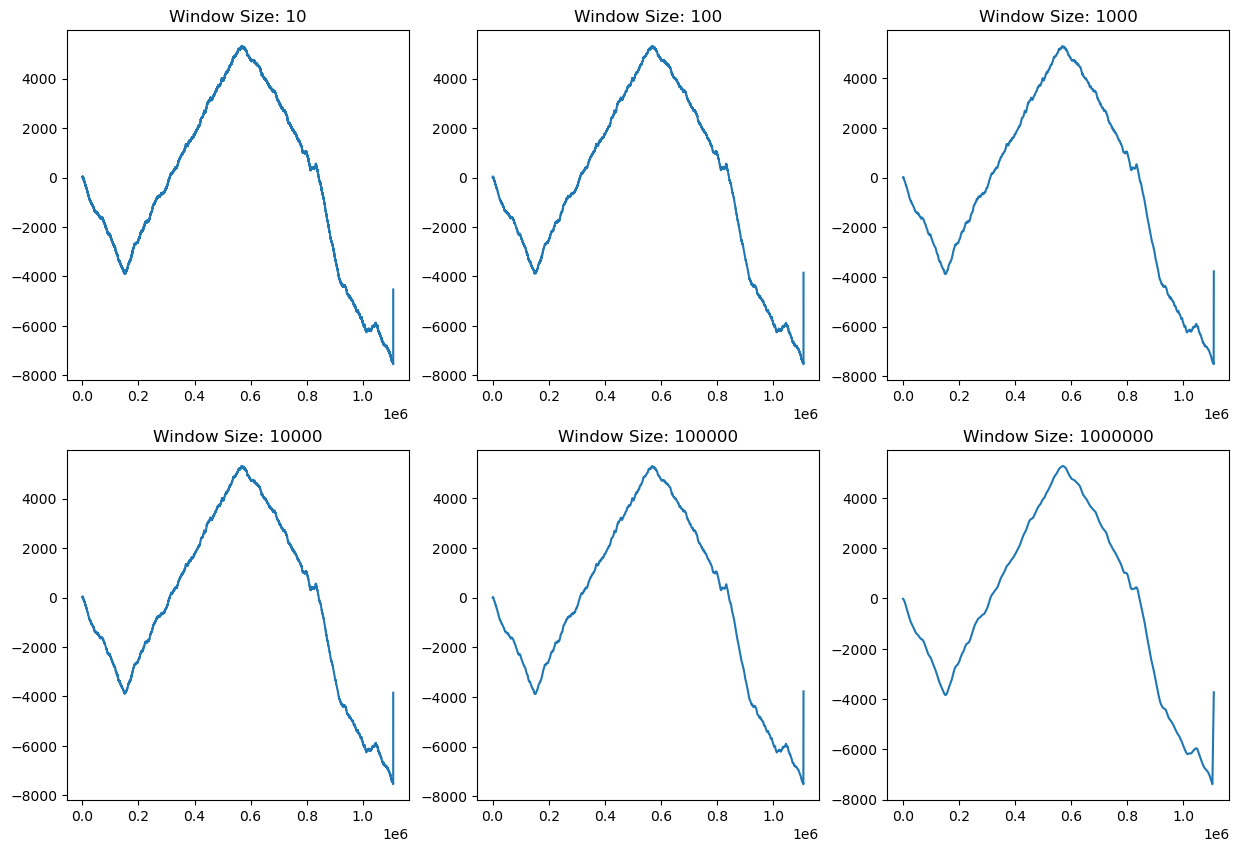

In [ ]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
for col in range(3):
    for row in range(2):
        ax[row, col].plot(genomeLoc, filteredGC[col + row])
        ax[row, col].set_title(f'Window Size: {10 ** (row * 3 + col + 1)}')

plt.show()

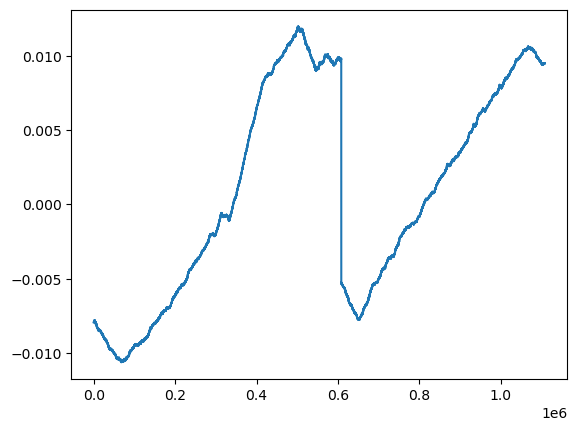

In [ ]:
derivativeFilter = [-1, 0, 1]
derivative = np.convolve(filteredGC[5],  derivativeFilter, 'same')
plt.plot(genomeLoc[1:len(genomeLoc)-1], derivative[1:len(derivative)-1])

In [ ]:
# minGC = filteredGC[len(filteredGC) - 1]
# BEGIN: Find minimum values in filteredGC[5]
min_values = []
for i in range(len(filteredGC[5])):
    if i == 0:
        if filteredGC[5][i] < filteredGC[5][i+1]:
            min_values.append(filteredGC[5][i])
    elif i == len(filteredGC[5]) - 1:
        if filteredGC[5][i] < filteredGC[5][i-1]:
            min_values.append(filteredGC[5][i])
    else:
        if filteredGC[5][i] < filteredGC[5][i-1] and filteredGC[5][i] < filteredGC[5][i+1]:
            min_values.append(filteredGC[5][i])
# END: Find minimum values in filteredGC[5]


In [17]:
# 상위 top개의 가장 빈번한 pattern을 dictionary로 반환하는 함수
def FrequentDict(text, k, variations=0, top=1):
    # 반환 딕셔너리 변수 초기화
    FreqDict = dict()
    
    # 주어진 text에서 가능한 모든 pattern의 빈도수를 계산
    FreqArr = ComputeFreq(text, k, variations)
    
    # 상위 top rank에 속하는 "빈도"를 저장
    SortedFreqArr = sorted(FreqArr, reverse=True)
    TopFreq = SortedFreqArr[:top]
    
    # 저장된 빈도를 key로 가지고 그 빈도만큼 등장하는 pattern을 value로 dictionary 생성
    FreqArr = np.array(FreqArr)
    
    for freq in TopFreq:
        
        FreqIdx = np.where(FreqArr == freq)
        
        for idx in FreqIdx[0]:
            pattern = NumberToPattern(idx, k)
            
            if freq in FreqDict:
                FreqDict[freq].add(pattern)

            else:
                FreqDict[freq] = {pattern}
    
    return FreqDict

In [10]:
freqWordsDict = FrequentDict(genome, k, 0, 4)
pprint(freqWordsDict)

{122: ['AACGCCCGC', 'CGTTTGTTA', 'AACGCCCGC', 'CGTTTGTTA'],
 127: ['TAACGCCCG'],
 128: ['GCGTTTGTT']}


In [ ]:
betterClumps(genome, k, 500, 6)

{'AACAGCAAC',
 'ACAGCAACA',
 'AGAGAGAGA',
 'AGCAACAGC',
 'ATGTTATTG',
 'ATTGCGGAT',
 'ATTTTTGAT',
 'CAACAGCAA',
 'CAGCAACAG',
 'CGGATGTTA',
 'CTGGTTCTG',
 'GAGAGAGAG',
 'GATGTTATT',
 'GATTTTTGA',
 'GCAACAGCA',
 'GCGGATGTT',
 'GGATGTTAT',
 'GGTTCTGGT',
 'GTTATTGCG',
 'GTTCTGGTT',
 'TATTGCGGA',
 'TCTGGTTCT',
 'TGATTTTTG',
 'TGCGGATGT',
 'TGGTTCTGG',
 'TGTTATTGC',
 'TTATTGCGG',
 'TTCTGGTTC',
 'TTGATTTTT',
 'TTGCGGATG',
 'TTTGATTTT',
 'TTTTGATTT',
 'TTTTTGATT'}

In [ ]:
f.close()